### Code

In [1]:
import tensorflow as tf
#from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.python.ops import rnn, rnn_cell
#mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
import numpy as np # Included
import pandas as pd
import csv
import sys
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction import DictVectorizer as DV

#np.set_printoptions(threshold=sys.maxsize)

dir1="/home/ubuntu/dataset/"
#dir1="/Users/ejl334/Downloads/IoT Dataset by UC/Concatenated/Archive/"

from numpy import genfromtxt
benign_traffic = genfromtxt(dir1+'benign_traffic.csv', delimiter=',')
malicious_traffic_dataset = genfromtxt(dir1+'mirai_udp.csv', delimiter=',')

/home/ubuntu/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ubuntu/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:519: 

In [2]:
# DELETE COLUMNS WITH NAN
print("========================================================================")
print("***BENIGN TRAFFIC***")
print("========================================================================")
print("***DIMENSIONS***")
numrows = len(benign_traffic)
numcols = len(benign_traffic[0])
print("Dimensions Rows: %s Columns: %s" %(numrows,numcols))

print("***NAN ROWS***")
nan_rows=np.argwhere(np.isnan(benign_traffic).any(axis=1))
print(nan_rows)

print("***** NAN Removal *****")
benign_traffic = benign_traffic[~np.isnan(benign_traffic).any(axis=1)]

print("***DIMENSIONS***")
numrows_good = len(benign_traffic)
numcols = len(benign_traffic[0])
print("Dimensions Rows: %s Columns: %s" %(numrows_good,numcols))

print("***NAN ROWS***")
nan_rows=np.argwhere(np.isnan(benign_traffic).any(axis=1))
print(nan_rows)

print("========================================================================")
print("***MALICIOUS TRAFFIC***")
print("========================================================================")
print("***DIMENSIONS ML***")
malicious_dataset = malicious_traffic_dataset

numrows_ml = len(malicious_dataset)
numcols_ml = len(malicious_dataset[0])
print("Dimensions ML Rows: %s Columns: %s" %(numrows_ml,numcols_ml))

print("***NAN ROWS ML***")
nan_rows_ml=np.argwhere(np.isnan(malicious_dataset).any(axis=1))
print(nan_rows_ml)

print("***** NAN Removal ML *****")
malicious_dataset = malicious_dataset[~np.isnan(malicious_dataset).any(axis=1)]

print("***DIMENSIONS ML***")
numrows_bad = len(malicious_dataset)
numcols_bad = len(malicious_dataset[0])
print("Dimensions ML Rows: %s Columns: %s" %(numrows_bad,numcols_bad))
print("***NAN ROWS ML***")
nan_rows_ml=np.argwhere(np.isnan(malicious_dataset).any(axis=1))
print(nan_rows_ml)

***BENIGN TRAFFIC***
***DIMENSIONS***
Dimensions Rows: 555941 Columns: 115
***NAN ROWS***
[[     0]
 [ 49549]
 [ 62663]
 [101764]
 [277005]
 [339160]
 [437675]
 [489826]
 [536412]]
***** NAN Removal *****
***DIMENSIONS***
Dimensions Rows: 555932 Columns: 115
***NAN ROWS***
[]
***MALICIOUS TRAFFIC***
***DIMENSIONS ML***
Dimensions ML Rows: 1230006 Columns: 115
***NAN ROWS ML***
[[      0]
 [ 237666]
 [ 389148]
 [ 606183]
 [ 762432]
 [ 921041]
 [1072921]]
***** NAN Removal ML *****
***DIMENSIONS ML***
Dimensions ML Rows: 1229999 Columns: 115
***NAN ROWS ML***
[]


In [3]:
benign_traffic[0]

array([1.00000000e+00, 6.00000000e+01, 0.00000000e+00, 1.00000000e+00,
       6.00000000e+01, 0.00000000e+00, 1.00000000e+00, 6.00000000e+01,
       0.00000000e+00, 1.00000000e+00, 6.00000000e+01, 0.00000000e+00,
       1.00000000e+00, 6.00000000e+01, 0.00000000e+00, 1.00000000e+00,
       6.00000000e+01, 0.00000000e+00, 1.00000000e+00, 6.00000000e+01,
       0.00000000e+00, 1.00000000e+00, 6.00000000e+01, 0.00000000e+00,
       1.00000000e+00, 6.00000000e+01, 0.00000000e+00, 1.00000000e+00,
       6.00000000e+01, 0.00000000e+00, 1.00000000e+00, 6.00000000e+01,
       0.00000000e+00, 6.00000000e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 6.00000000e+01, 0.00000000e+00,
       6.00000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 6.00000000e+01, 0.00000000e+00, 6.00000000e+01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       6.00000000e+01, 0.00000000e+00, 6.00000000e+01, 0.00000000e+00,
      

In [4]:
# DELETE UNWANTED COLUMNS
benign_traffic = np.delete(benign_traffic, [2,5,8,11,14,17,20,23,26,29,\
                                            34,35,41,42,48,49,55,56,62,63,\
                                            66,67,69,70,72,73,75,76,78,79,\
                                            84,85,91,92,98,99,105,106,112,113,], axis=1)
malicious_dataset = np.delete(malicious_dataset, [2,5,8,11,14,17,20,23,26,29,\
                                            34,35,41,42,48,49,55,56,62,63,\
                                            66,67,69,70,72,73,75,76,78,79,\
                                            84,85,91,92,98,99,105,106,112,113,], axis=1)


In [5]:
print("***DIMENSIONS BENIGN***")
numrows_good = len(benign_traffic)
numcols_good = len(benign_traffic[0])
print("Dimensions Rows: %s Columns: %s" %(numrows_good,numcols_good))
print("***DIMENSIONS MALICIOUS***")
numrows_bad = len(malicious_dataset)
numcols_bad = len(malicious_dataset[0])
print("Dimensions Rows: %s Columns: %s" %(numrows_bad,numcols_bad))

***DIMENSIONS BENIGN***
Dimensions Rows: 555932 Columns: 75
***DIMENSIONS MALICIOUS***
Dimensions Rows: 1229999 Columns: 75


In [6]:
# Define Labels
y_benings = np.zeros(len(benign_traffic),dtype=int)
y_malicious = np.ones(len(malicious_dataset),dtype=int)

complete_dataset = np.concatenate((benign_traffic, malicious_dataset), 0)
print("*** COMPLETE DATASET ***")
numrows = len(complete_dataset)
numcols = len(complete_dataset[0])
print("Dimensions Rows: %s Columns: %s" %(numrows,numcols))
complete_dataset_labels = np.concatenate((y_benings,y_malicious),0)
print("*** COMPLETE DATASET Labels ***")
numrows = len(complete_dataset_labels)
numcols = len(complete_dataset_labels)
print("Dimensions Rows: %s" %(numrows))

*** COMPLETE DATASET ***
Dimensions Rows: 1785931 Columns: 75
*** COMPLETE DATASET Labels ***
Dimensions Rows: 1785931


In [7]:
# NORMALIZE DATASET
scaler = MinMaxScaler(feature_range=(0, 1))
dataX_ = scaler.fit_transform(complete_dataset)
#dataX_ = scaler.fit_transform(np.reshape(complete_dataset, (numrows, numcols)))
#                                                        (5000,100*75)
X_ = dataX_
#X_ = np.reshape(dataX_, (numrows, numcols))
#X_ = np.reshape(dataX_, (5000, 100, 75))

In [8]:
from sklearn import model_selection
validation_size = 0.40
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X_, complete_dataset_labels, test_size=validation_size, random_state=seed)

##### NEW #####
validation_size = 0.50
seed = 7
X_validation, X_test, Y_validation, Y_test = model_selection.train_test_split(X_validation, Y_validation, test_size=validation_size, random_state=seed)
###############


del X_
del dataX_


In [9]:
#benign_traffic = X_[:numrows_good, :]
#malicious_dataset = X_[numrows_good:, :]

# print("*** COMPLETE DATASET ***")
# numrows = len(benign_traffic)
# numcols = len(benign_traffic[0])
# print("Dimensions Rows: %s Columns: %s" %(numrows,numcols))

# print("*** COMPLETE DATASET ***")
# numrows = len(malicious_dataset)
# numcols = len(malicious_dataset[0])
# print("Dimensions Rows: %s Columns: %s" %(numrows,numcols))

# # Clear Variables
# del X_
# del dataX_


In [10]:
# def rounder(x):
#     if (x-int(x) >= 0.5):
#         return np.ceil(x)
#     else:
#         return np.floor(x)

# split1 = int(rounder(len(benign_traffic)*0.8))
# split2 = int(rounder(len(malicious_dataset)*0.8))
# current_bot_data = gafgyt_combo

# print(split1)
# print(split2)

In [11]:
# def dimensions_data(x):
#     numrows = len(x)
#     numcols = len(x[0])
#     print("Dimensions Rows: %s Columns: %s" %(numrows,numcols))


# benign_pre_train_x = benign_traffic[:split1, :]
# print("*** DIMENSIONS benign_pre_train_x***")
# dimensions_data(benign_pre_train_x)

# benign_pre_test_x = benign_traffic[split1:, :]
# print("*** DIMENSIONS benign_pre_test_x***")
# dimensions_data(benign_pre_test_x)

# benign_pre_train_y = y_benings[:split1, :]
# print("*** DIMENSIONS benign_pre_train_y***")
# dimensions_data(benign_pre_train_y)

# benign_pre_test_y = y_benings[split1:, :]
# print("*** DIMENSIONS benign_pre_test_y***")
# dimensions_data(benign_pre_test_y)



# malicious_pre_train_x = malicious_dataset[:split2, :]
# print("*** DIMENSIONS malicious_pre_train_x***")
# dimensions_data(malicious_pre_train_x
#                )
# malicious_pre_test_x = malicious_dataset[split2:, :]
# print("*** DIMENSIONS malicious_pre_test_x***")
# dimensions_data(malicious_pre_test_x)

# malicious_pre_train_y = y_malicious[:split2, :]
# print("*** DIMENSIONS malicious_pre_train_y***")
# dimensions_data(malicious_pre_train_y)

# malicious_pre_test_y = y_malicious[split2:, :]
# print("*** DIMENSIONS malicious_pre_test_y***")
# dimensions_data(malicious_pre_test_y)

# train_x = np.concatenate((benign_pre_train_x, malicious_pre_train_x), 0)
# print("*** DIMENSIONS - TRAIN_X ***")
# dimensions_data(train_x)
    
# test_x = np.concatenate((benign_pre_test_x, malicious_pre_test_x), 0)
# print("*** DIMENSIONS TEXT_X ***")
# dimensions_data(test_x)

# train_y = np.concatenate((benign_pre_train_y,malicious_pre_train_y),0)
# print("*** DIMENSIONS TRAIN_Y ***")
# dimensions_data(train_y)

# test_y = np.concatenate((benign_pre_test_y,malicious_pre_test_y),0)
# print("*** DIMENSIONS TEST_Y***")
# dimensions_data(test_y)

In [12]:
# print(benign_traffic[0:2])
# numrows = len(benign_traffic)    # 3 rows in your example
# numcols = len(benign_traffic[0]) # 2 columns in your example
# print("Dimensions Rows: %s Columns: %s" %(numrows,numcols))

In [13]:
print(np.shape(X_train), np.shape(X_validation), np.shape(X_test))
print(len(Y_train), len(Y_validation), len(Y_test))
#print(np.count_nonzero(X_train), np.count_nonzero(Y_train))

(1071558, 75) (357186, 75) (357187, 75)
1071558 357186 357187


In [14]:
# Vectorize data
print(len(Y_validation))
#vector_train_x = X_train.reshape((85687, 10, 75))
vector_train_x = X_train.reshape((len(X_train), 1, 75))
print(vector_train_x.shape)
#vector_test_x = X_validation.reshape((23802, 9, 75))
vector_validation_x = X_validation.reshape((len(X_validation), 1, 75))
print(vector_validation_x.shape)

##### NEW #####
vector_test_x = X_test.reshape((len(X_test), 1, 75))
print(vector_test_x.shape)
###############

#vector_train_x = train_x.reshape(856871,75,np.newaxis)
#vector_test_x = test_x.reshape(214217,75,np.newaxis)
#print(vector_train_x[0])

357186
(1071558, 1, 75)
(357186, 1, 75)
(357187, 1, 75)


# LSTM MODEL

In [43]:
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from sklearn import model_selection

batch_size = 100000
model = Sequential()
model.add(LSTM(28, input_shape=(1,75), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(28))
model.add(Dropout(0.5))
model.add(Dense(28))
model.add(Dense(1, activation="softmax"))
#model.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 1, 28)             11648     
_________________________________________________________________
dropout_7 (Dropout)          (None, 1, 28)             0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 28)                6384      
_________________________________________________________________
dropout_8 (Dropout)          (None, 28)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 28)                812       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 29        
Total params: 18,873
Trainable params: 18,873
Non-trainable params: 0
__________________________________________________

In [45]:
history = model.fit(vector_train_x, Y_train, epochs=25, batch_size=batch_size, validation_data=(vector_validation_x, Y_validation), verbose=2, shuffle=True)#callbacks=[early_stopping]


Train on 1071558 samples, validate on 357186 samples
Epoch 1/25
 - 3s - loss: 4.9578 - acc: 0.6890 - val_loss: 4.9875 - val_acc: 0.6872
Epoch 2/25
 - 3s - loss: 4.9578 - acc: 0.6890 - val_loss: 4.9875 - val_acc: 0.6872
Epoch 3/25
 - 3s - loss: 4.9578 - acc: 0.6890 - val_loss: 4.9875 - val_acc: 0.6872
Epoch 4/25
 - 3s - loss: 4.9578 - acc: 0.6890 - val_loss: 4.9875 - val_acc: 0.6872
Epoch 5/25
 - 3s - loss: 4.9578 - acc: 0.6890 - val_loss: 4.9875 - val_acc: 0.6872
Epoch 6/25
 - 3s - loss: 4.9578 - acc: 0.6890 - val_loss: 4.9875 - val_acc: 0.6872
Epoch 7/25
 - 3s - loss: 4.9578 - acc: 0.6890 - val_loss: 4.9875 - val_acc: 0.6872
Epoch 8/25
 - 3s - loss: 4.9578 - acc: 0.6890 - val_loss: 4.9875 - val_acc: 0.6872
Epoch 9/25
 - 3s - loss: 4.9578 - acc: 0.6890 - val_loss: 4.9875 - val_acc: 0.6872
Epoch 10/25
 - 3s - loss: 4.9578 - acc: 0.6890 - val_loss: 4.9875 - val_acc: 0.6872
Epoch 11/25
 - 3s - loss: 4.9578 - acc: 0.6890 - val_loss: 4.9875 - val_acc: 0.6872
Epoch 12/25
 - 3s - loss: 4.9578

KeyboardInterrupt: 

In [33]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(vector_test_x).ravel()
print(y_pred_keras)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_test, y_pred_keras)
print("FPR: %s \nTPR: %s \nTreasholds: %s" %(fpr_keras, tpr_keras, thresholds_keras))

[1. 1. 1. ... 1. 1. 1.]
FPR: [0. 1.] 
TPR: [0. 1.] 
Treasholds: [2. 1.]


In [34]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

In [35]:
#from sklearn.ensemble import RandomForestClassifier
# Supervised transformation based on random forests
# rf = RandomForestClassifier(max_depth=3, n_estimators=10)
# rf.fit(X_train, Y_train)

# y_pred_rf = rf.predict_proba(X_validation)[:, 1]
# fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_validation, y_pred_rf)
# auc_rf = auc(fpr_rf, tpr_rf)



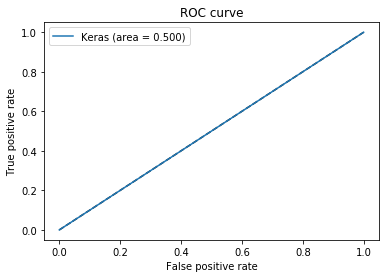

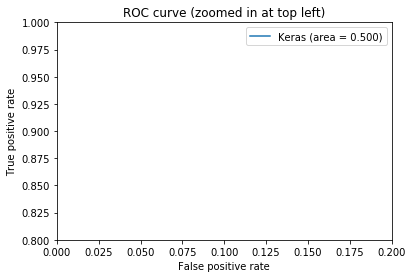

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

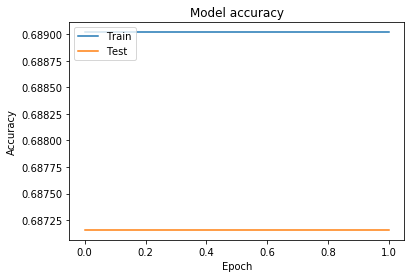

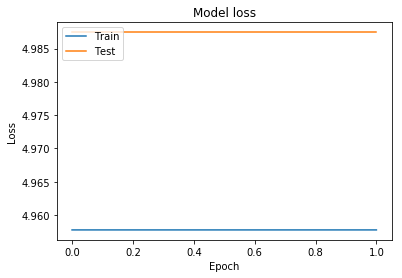

In [37]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [38]:
# def specificity(y_pred, y_true):
#     """
#     param:
#     y_pred - Predicted labels
#     y_true - True labels 
#     Returns:
#     Specificity score
#     """
#     neg_y_true = 1 - y_true
#     print(neg_y_true)
#     neg_y_pred = 1 - y_pred
#     print(neg_y_pred)
#     fp = K.sum(neg_y_true * y_pred)
#     tn = K.sum(neg_y_true * neg_y_pred)
#     specificity = tn / (tn + fp + K.epsilon())
#     return specificity

# specificity_ = (y_pred_rf,Y_validation)
# print(specificity_)

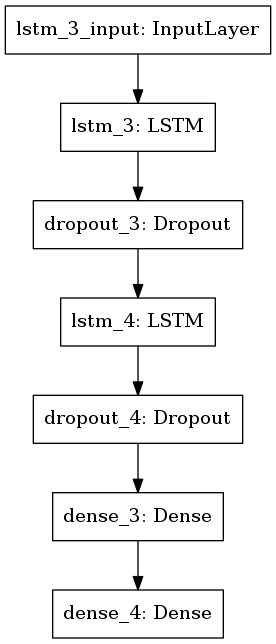

In [39]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

print(y_pred_keras[0:4])
print('Confusion Matrix')
print(confusion_matrix(Y_test, y_pred_keras))
print('Classification Report')
target_names = ['Good', 'Bad']
print(classification_report(Y_test, y_pred_keras, target_names=target_names))


[1. 1. 1. 1.]
Confusion Matrix
[[     0 110956]
 [     0 246231]]
Classification Report


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

        Good       0.00      0.00      0.00    110956
         Bad       0.69      1.00      0.82    246231

    accuracy                           0.69    357187
   macro avg       0.34      0.50      0.41    357187
weighted avg       0.48      0.69      0.56    357187

